In [1]:
from tensorflow.keras.datasets import mnist

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
def get_mnist_model():
    inputs = keras.Input(shape=(28*28,))
    features = layers.Dense(512, activation='relu')(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation='softmax')(features)
    model = keras.Model(inputs, outputs)
    return model

In [3]:
(images, labels), (test_images, test_labels) = mnist.load_data()

In [4]:
images = images.reshape((60000, 28*28)).astype('float32')/255

In [5]:
test_images = test_images.reshape((10000, 28*28)).astype('float32')/255

In [6]:
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [7]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

Epoch 1/3
1563/1563 [==============================] - 5s 2ms/step - loss: 0.2951 - accuracy: 0.9124 - val_loss: 0.1547 - val_accuracy: 0.9552
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1647 - accuracy: 0.9534 - val_loss: 0.1214 - val_accuracy: 0.9650
Epoch 3/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1428 - accuracy: 0.9619 - val_loss: 0.1214 - val_accuracy: 0.9698


In [9]:
test_metrics = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1111 - accuracy: 0.9701


In [10]:
predictions = model.predict(test_images)

313/313 [==============================] - 0s 796us/step


In [11]:
class RootMeanSquaredError(keras.metrics.Metric):
    def __init__(self, name='rmse', **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
        self.total_samples = self.add_weight(
            name='total_samples', initializer='zeros', dtype='int32')
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)
        
    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))
    
    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [12]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', RootMeanSquaredError()])

In [13]:
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))

Epoch 1/3
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2934 - accuracy: 0.9129 - rmse: 7.1886 - val_loss: 0.1573 - val_accuracy: 0.9554 - val_rmse: 7.3575
Epoch 2/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1683 - accuracy: 0.9533 - rmse: 7.3543 - val_loss: 0.1164 - val_accuracy: 0.9676 - val_rmse: 7.4063
Epoch 3/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1379 - accuracy: 0.9625 - rmse: 7.3880 - val_loss: 0.1080 - val_accuracy: 0.9720 - val_rmse: 7.4225


In [14]:
test_metrics = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1004 - accuracy: 0.9734 - rmse: 7.4349


In [16]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=2),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.keras',
        monitor='val_loss',
        save_best_only = True)
]

In [17]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2967 - accuracy: 0.9128 - val_loss: 0.1490 - val_accuracy: 0.9568
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1662 - accuracy: 0.9537 - val_loss: 0.1211 - val_accuracy: 0.9677
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1421 - accuracy: 0.9618 - val_loss: 0.1283 - val_accuracy: 0.9677
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1266 - accuracy: 0.9678 - val_loss: 0.1087 - val_accuracy: 0.9754
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1192 - accuracy: 0.9709 - val_loss: 0.1223 - val_accuracy: 0.9725
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1115 - accuracy: 0.9734 - val_loss: 0.1142 - val_accuracy: 0.9763
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1044 - accuracy: 0.9748 - val_loss: 0.1220 - val_accuracy:

In [18]:
# model.save('my_checkpoint_path')

model = keras.models.load_model('checkpoint_path.keras')

In [ ]:
on_epoch_begin(epoch, logs)
on_epoch_end(epoch, logs)
on_batch_begin(batch, logs)
on_batch_end(batch, logs)
on_train_begin(logs)
on_train_end(logs)

In [20]:
from  matplotlib import pyplot as plt

In [21]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
        
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get('loss'))
        
    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label='Training loss for each batch')
        plt.xlabel(f'Batch (epoch {epoch})')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig(f'plot_at_epoch_{epoch}')
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2926 - accuracy: 0.9126 - val_loss: 0.1457 - val_accuracy: 0.9579
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1639 - accuracy: 0.9535 - val_loss: 0.1211 - val_accuracy: 0.9691
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1392 - accuracy: 0.9621 - val_loss: 0.1088 - val_accuracy: 0.9726
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1224 - accuracy: 0.9681 - val_loss: 0.1070 - val_accuracy: 0.9739
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1190 - accuracy: 0.9709 - val_loss: 0.1098 - val_accuracy: 0.9744
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1120 - accuracy: 0.9721 - val_loss: 0.1090 - val_accuracy: 0.9768
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1029 - accuracy: 0.9755 - val_loss: 0.1014 - val_accuracy:

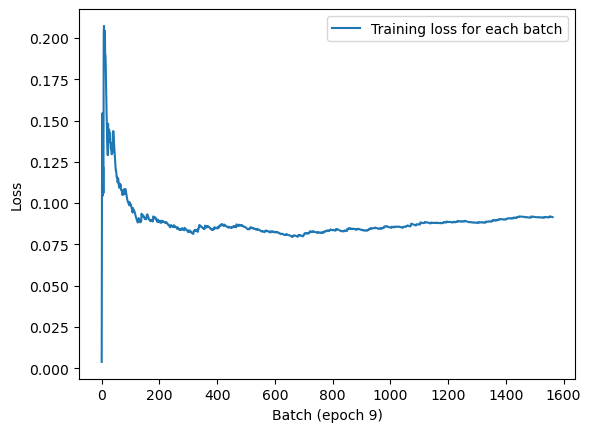

In [22]:
model = get_mnist_model()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

In [30]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = keras.callbacks.TensorBoard(
    log_dir='C:\logs')
model.fit(train_images, train_labels, epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2904 - accuracy: 0.9155 - val_loss: 0.1531 - val_accuracy: 0.9562
Epoch 2/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1630 - accuracy: 0.9524 - val_loss: 0.1151 - val_accuracy: 0.9696
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1389 - accuracy: 0.9630 - val_loss: 0.1137 - val_accuracy: 0.9705
Epoch 4/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1247 - accuracy: 0.9682 - val_loss: 0.1044 - val_accuracy: 0.9735
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1155 - accuracy: 0.9706 - val_loss: 0.1138 - val_accuracy: 0.9748
Epoch 6/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9728 - val_loss: 0.1098 - val_accuracy: 0.9750
Epoch 7/10
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1043 - accuracy: 0.9754 - val_loss: 0.1087 - val_accuracy:

In [31]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = keras.callbacks.TensorBoard(
    log_dir='C:\logs')
model.fit(train_images, train_labels, epochs=20,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2964 - accuracy: 0.9128 - val_loss: 0.1448 - val_accuracy: 0.9592
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1674 - accuracy: 0.9521 - val_loss: 0.1217 - val_accuracy: 0.9675
Epoch 3/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1388 - accuracy: 0.9624 - val_loss: 0.1128 - val_accuracy: 0.9716
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1269 - accuracy: 0.9677 - val_loss: 0.1087 - val_accuracy: 0.9735
Epoch 5/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1153 - accuracy: 0.9711 - val_loss: 0.1035 - val_accuracy: 0.9754
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1100 - accuracy: 0.9734 - val_loss: 0.1199 - val_accuracy: 0.9739
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1050 - accuracy: 0.9758 - val_loss: 0.1122 - val_accuracy:

In [32]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
tensorboard = keras.callbacks.TensorBoard(
    log_dir='C:\logs')
model.fit(train_images, train_labels, epochs=20,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2956 - accuracy: 0.9129 - val_loss: 0.1451 - val_accuracy: 0.9571
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1688 - accuracy: 0.9536 - val_loss: 0.1161 - val_accuracy: 0.9672
Epoch 3/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1389 - accuracy: 0.9632 - val_loss: 0.1114 - val_accuracy: 0.9704
Epoch 4/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1241 - accuracy: 0.9679 - val_loss: 0.1090 - val_accuracy: 0.9732
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1202 - accuracy: 0.9701 - val_loss: 0.1167 - val_accuracy: 0.9755
Epoch 6/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1108 - accuracy: 0.9731 - val_loss: 0.1158 - val_accuracy: 0.9753
Epoch 7/20
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1064 - accuracy: 0.9751 - val_loss: 0.1148 - val_accuracy:

In [33]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
        gradients = tape.gradients(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(model.trainable_weights, gradients))

In [34]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f'result: {current_result:.2f}')

result: 1.00


In [35]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f'Mean of values: {mean_tracker.result():.2f}')

Mean of values: 2.00


In [36]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
        
    loss_tracking_metric.update_state(loss)
    logs['loss'] = loss_tracking_metric.result()
    return logs

In [37]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [38]:
training_dataset = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs=3

for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f'Results at the end of epoch {epoch}')
    for key, value in logs.items():
        print(f'...{key}: {value:.4f}')

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9161
...loss: 0.2882
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9542
...loss: 0.1641
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9631
...loss: 0.1402


In [39]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    
    logs = {}
    
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs['val_' + metric.name] = metric.result()
        loss_tracking_metric.update_state(loss)
        logs['val_loss'] = loss_tracking_metric.result()

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print('Evaluation results:')
for key, value in logs.items():
    print(f'...{key}:{value:.4f}')

In [42]:
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)
    
    logs = {}
    
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs['val_' + metric.name] = metric.result()
        
    loss_tracking_metric.update_state(loss)
    logs['val_loss'] = loss_tracking_metric.result()
    return logs

In [43]:
val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()

for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print('Evaluation results:')
for key, value in logs.items():
    print(f'...{key}:{value:.4f}')

Evaluation results:
...val_sparse_categorical_accuracy:0.9665
...val_loss:0.1338


In [44]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name='loss')

In [45]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
            
        loss_tracker.update_state(loss)
        return {'loss': loss_tracker.result()}
    @property
    def metrics(self):
        return [loss_tracker]

In [48]:
inputs = keras.Input(shape=(28*28,))
features = layers.Dense(512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation='softmax')(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 4s 3ms/step - loss: 0.2942
Epoch 2/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1645
Epoch 3/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1360


In [49]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions)
        gradients = tape.gradient(loss, model.trainable_weights)
        optimizer.apply_gradients(zip(gradients, model.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions)
        return {m.name:m.result() for m in self.metrics}

In [50]:
inputs = keras.Input(shape=(28*28,))
features = layers.Dense(512, activation='relu')(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation='softmax')(features)
model = CustomModel(inputs, outputs)

In [51]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

In [52]:
model.fit(train_images, train_labels, 
          epochs=3)

Epoch 1/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.2943 - sparse_categorical_accuracy: 0.9139
Epoch 2/3
1563/1563 [==============================] - 4s 2ms/step - loss: 0.1658 - sparse_categorical_accuracy: 0.9532
Epoch 3/3
1563/1563 [==============================] - 3s 2ms/step - loss: 0.1377 - sparse_categorical_accuracy: 0.9630
